In [3]:
# % matplotlib inline
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [5]:
df = pd.read_csv('2-train.csv')

In [6]:
profile = ProfileReport(df)

In [7]:
profile.to_file('2-titanic.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 64.68it/s]


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# filling missing values

In [9]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [21]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df.Embarked.fillna('S', inplace=True)

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
df.shape

(891, 12)

# handle categoricals

In [27]:
# One Hot Encoder
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)


In [28]:
df.shape

(891, 14)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [30]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(max_iter=500)

In [42]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [58]:
train_cols = ['Age','SibSp','Parch','Fare',
              'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q','Embarked_S']
target_col = 'Survived'

In [59]:
cross_val_score(lr, df[train_cols], df[target_col], cv=5)


array([0.78212291, 0.80337079, 0.78651685, 0.76966292, 0.83707865])

In [60]:
lr.fit(df[train_cols], df[target_col])


LogisticRegression(max_iter=500)

In [46]:
probs = lr.predict_proba(df[train_cols])

In [47]:
psur = probs[:,1]

In [80]:
psur[:10]

array([0.09200093, 0.907542  , 0.61578721, 0.86938732, 0.07962019,
       0.13490653, 0.25364127, 0.09652884, 0.56355416, 0.90817577])

In [48]:
preds = lr.predict(df[train_cols])

In [79]:
preds[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score

In [50]:
precision_score(df['Survived'], preds), recall_score(df['Survived'], preds)

(0.7734627831715211, 0.6988304093567251)

In [51]:
roc_auc_score(df['Survived'], psur)

0.8571698675955219

In [52]:
fpr, tpr, thresholds = roc_curve(df['Survived'], psur)

In [53]:
import matplotlib.pyplot as plt

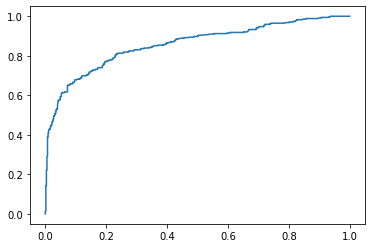

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.show()